In [39]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [40]:
db = {}
data = pd.read_csv('IR-assignment-2-data.txt', sep=" ", header=None)
for i in range(0,len(data)):
    if (data.at[i,1] == "qid:4"):
        db[i] = data.at[i,0]
temp =data.drop((data.index[len(db):]))
np.savetxt('query4max.txt', temp.values, fmt='%s', delimiter=" ")
unsortedDb = db.items()
unsortedDb = list(unsortedDb)
db = sorted(db.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

In [41]:
c1=0
c2=0
c3=0
c4=0
for i in db:
    if (i[1] == 3):
        c1+=1;
    elif (i[1] == 2):
        c2+=1;
    elif (i[1] == 1):
        c3+=1;
    else:
        c4+=1;
print("Number Of files :"+str(math.factorial(c1)*math.factorial(c2)*math.factorial(c3)*math.factorial(c4)))

Number Of files :19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [42]:
def findDCG(data):
    ans = data[0][1];
    for i in range(1, len(data)):
        temp = (data[i][1]/math.log2(i+1))
        ans= ans + temp    
    return ans   

In [43]:
maxDcgValue = findDCG(db)
unsortedDcgValue = findDCG(unsortedDb)
maxDcgValue_50 = findDCG(db)
unsortedDcgValue_50 = findDCG(unsortedDb)
print(f"Max DCG is: {maxDcgValue}")
print(f"nDCG 50: {(unsortedDcgValue_50/maxDcgValue_50)}")
print(f"nDCG whole : {(unsortedDcgValue/maxDcgValue)}")

Max DCG is: 20.989750804831445
nDCG 50: 0.5979226516897831
nDCG whole : 0.5979226516897831


In [45]:
totalRelDocs = 0
for i in range(len(db)):
    if db[i][1]!=0:
        totalRelDocs+=1

In [46]:
totalRelDocs

44

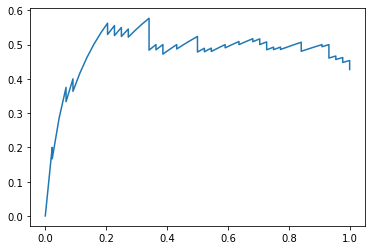

In [50]:
rel_tf_pairs = {}  
# Database for storing Relevance and tf-idf pairs
for i in range(0,len(data)):
        if (data.at[i,1] == "qid:4"):
            s = float(data.at[i,76][3:])  
            temp = (s,data.at[i,0])
            rel_tf_pairs[i] = (temp)
sortedByTF = sorted(rel_tf_pairs.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
totalDocs = len(db)
retrivedRelDocs = 0;
precision = []
recall = []
for i in range(0, len(sortedByTF)):
        if (sortedByTF[i][1][1] != 0):
            retrivedRelDocs+=1
        precision.append(retrivedRelDocs/(i+1))
        recall.append(retrivedRelDocs/totalRelDocs)
plt.plot(recall, precision)
plt.show()